# SPAM DETECTION IN SMS

# Libraries Imported :

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import nltk 
import string

from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
 
ps = PorterStemmer()

import the Dataset :

In [2]:
df = pd.read_csv('spam.csv')


In [3]:
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Read the Dataset :

In [4]:
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail(10)

,Label,Text
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


View the Dataset Information :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,Label,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.min()

Label                                     ham
Text      &lt;#&gt;  in mca. But not conform.
dtype: object

In [9]:
df.max()

Label                                                 spam
Text     â°Ã_ we r stayin here an extra week, back ne...
dtype: object

In [10]:
df.shape

(5572, 2)

In [11]:
df['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

# Data Visualization :

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Label', ylabel='count'>

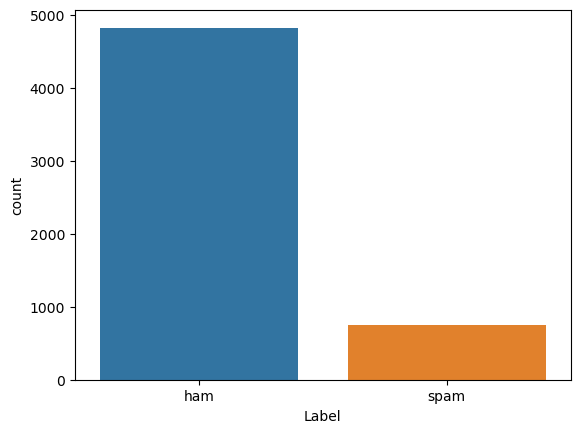

In [13]:
sns.countplot(x='Label',data=df)

In [14]:
# The names of the features
print("The names of the features :\n", list(df.columns))

The names of the features :
 ['Label', 'Text']


In [15]:
df.isnull().sum()

Label    0
Text     0
dtype: int64

In [16]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (403, 2)


In [17]:
df = df.drop_duplicates()
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# LabelEncoding method :

In [18]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

df = df.drop_duplicates(keep='first')

In [19]:
df['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='Density'>

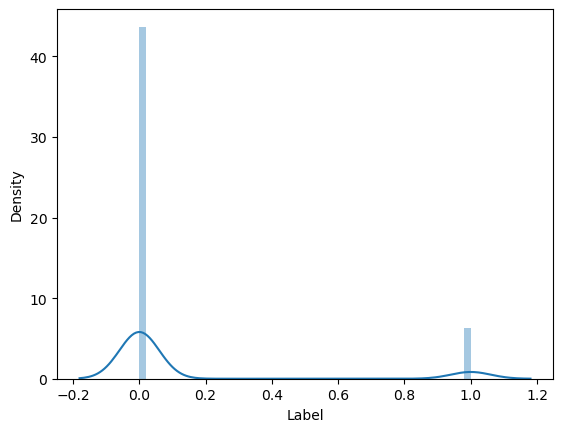

In [20]:
sns.distplot(df['Label'])

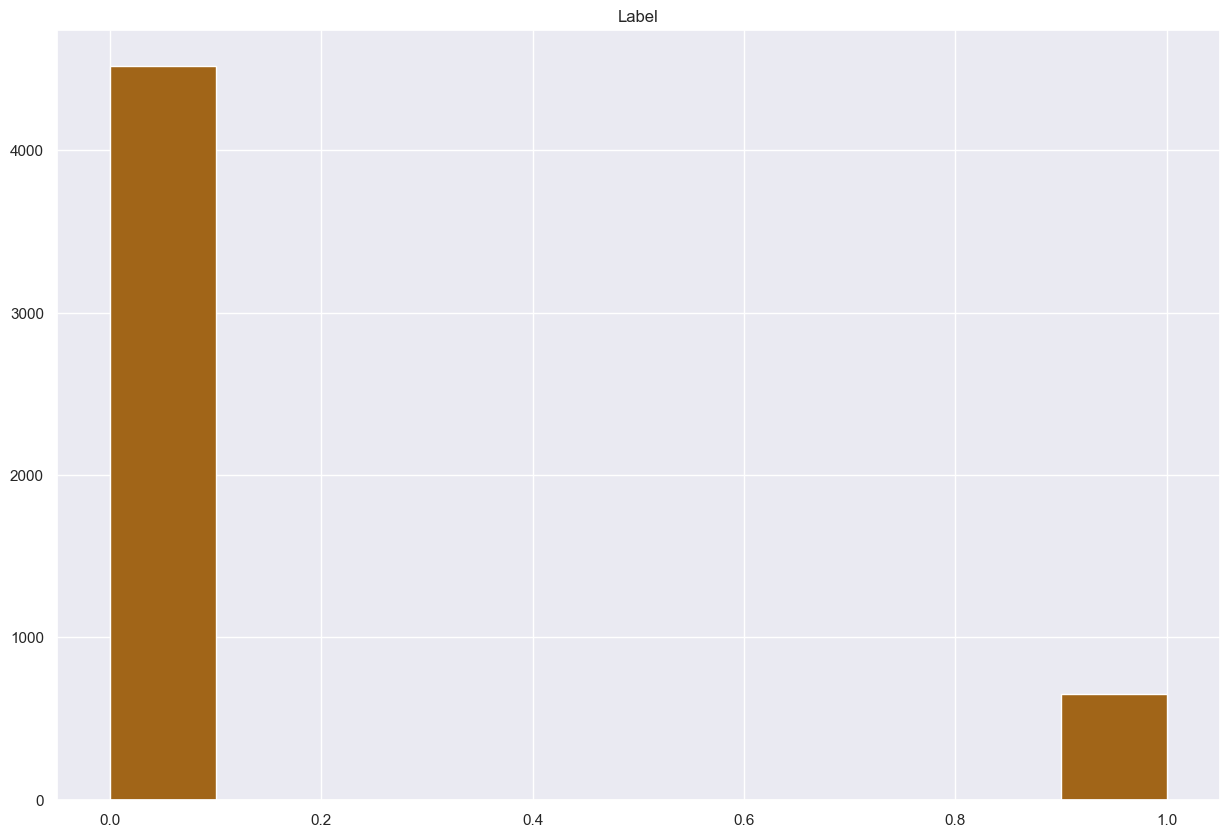

In [21]:
sns.set(palette='BrBG')
df.hist(figsize=(15,10));

In [22]:
def get_importantFeatures(sent):
    sent = sent.lower()
    
    returnList = []
    sent = nltk.word_tokenize(sent)
    for i in sent:
        if i.isalnum():
            returnList.append(i)
    return returnList
 
def removing_stopWords(sent):
    returnList = []
    for i in sent:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            returnList.append(i)
    return returnList
 
def potter_stem(sent):
    returnList = []
    for i in sent:
        returnList.append(ps.stem(i))
    return " ".join(returnList)

In [23]:
df['imp_feature'] = df['Text'].apply(get_importantFeatures)

df['imp_feature'] = df['imp_feature'].apply(removing_stopWords)

df['imp_feature'] = df['imp_feature'].apply(potter_stem)

# Train and Test :

In [24]:
from sklearn.model_selection import train_test_split
X = df['imp_feature']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
# Print counts of each class
print("- Counting Splits -")
print("Training Samples:", len(X_train))
print("Testing Samples:", len(X_test))

- Counting Splits -
Training Samples: 3876
Testing Samples: 1293


- Diagram for total dataset -


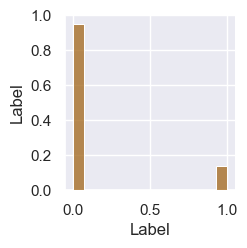

In [26]:

print("- Diagram for total dataset -")
sns.pairplot(df)

View the train and test data :

In [27]:
X_test

1617                                 u download fring app
2064    pass di ur contact n see wat u get red luv wid...
1272                                                   ok
3020                                  film ill call later
3642    sorri left phone upstair ok might hectic would...
                              ...                        
5571                                       rofl true name
4070                        reach home n bath liao u call
4578                                             plan yet
4834    oh rite well im best mate pete went 4 2geva lo...
3896                                         thank wonder
Name: imp_feature, Length: 1293, dtype: object

In [28]:
X_train

5022    anyway holla whenev around need excus go creep...
4411                            said anyth wrong sorri de
2930                                     hi test lt gt rd
3046    much though h friday cant wait dunno wot hell ...
331         mayb could get book tomo return immedi someth
                              ...                        
4740            mani happi return day wish happi birthday
474     nice line said broken plz cum 1 time infront w...
3266                               ok come n pick u engin
4016    eek lot time especi sinc american pie like 8 m...
879     u secret admir look 2 make contact r reveal th...
Name: imp_feature, Length: 3876, dtype: object

In [29]:
y_test

1617    0
2064    0
1272    0
3020    0
3642    0
       ..
5571    0
4070    0
4578    0
4834    0
3896    0
Name: Label, Length: 1293, dtype: int32

In [30]:
y_train

5022    0
4411    0
2930    0
3046    0
331     0
       ..
4740    0
474     0
3266    0
4016    0
879     1
Name: Label, Length: 3876, dtype: int32

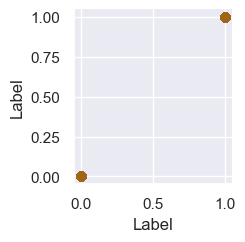

In [31]:
# Then you map to the grid
g = sns.PairGrid(df)
g.map(plt.scatter)

# Algorithm :

In [32]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from nltk.stem.porter import PorterStemmer

In [33]:
tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(X_train)
 
tuned_parameters = {'kernel':['linear','rbf'],'gamma':[1e-3,1e-4], 'C':[1,10,100,1000]}
 
model = GridSearchCV(svm.SVC(),tuned_parameters)
model.fit(feature, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [34]:
feature

<3876x5699 sparse matrix of type '<class 'numpy.float64'>'
	with 30353 stored elements in Compressed Sparse Row format>

In [35]:
y_predict = tfidf.transform(X_test)
print("Accuracy Score for svc model:",model.score(y_predict,y_test))

Accuracy Score for svc model: 0.9814385150812065


# View the test  for UI :

In [36]:
import pickle  #machine stored file
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [37]:
from tkinter import *   #ui page 
import tkinter as tk
 
spam_model = pickle.load(open("finalized_model.sav",'rb'))
 
def check_spam():
    text = spam_text_Entry.get()
    is_spam = spam_model.predict(tfidf.transform([text]))
    if is_spam == 1:
        print("text is spam")
        my_string_var.set("Result: text is spam")
    else:
        print("text is not spam")
        my_string_var.set("Result: text is not spam")
win = Tk() #ui allignment
 
win.geometry("400x600")
win.configure(background="cyan")
win.title("SMS SPAM DETECTOR")
 
title = Label(win, text="SMS SPAM DETECTOR", bg="gray",width="300",height="2",fg="white",font=("Calibri 20 bold italic underline")).pack()
 
spam_text = Label(win, text="Enter your Text: ",bg="cyan", font=("Verdana 12")).place(x=12,y=100)
spam_text_Entry = Entry(win, textvariable=spam_text,width=33)
spam_text_Entry.place(x=155, y=105)
 
my_string_var = StringVar()
my_string_var.set("Result: ")
 
print_spam = Label(win, textvariable=my_string_var,bg="cyan", font=("Verdana 12")).place(x=12,y=200)
 
Button = Button(win, text="Submit",width="12",height="1",activebackground="red",bg="Pink",command=check_spam,font=("Verdana 12")).place(x=12,y=150)
 
win.mainloop()

# ---- END ---